In [10]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

ERROR: File `u'! DEFAULT PLOT THINGIES.ipynb.py'` not found.


<IPython.core.display.Javascript object>

`%matplotlib` prevents importing * from pylab and numpy


Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\quadratic-stress-fit
Populating the interactive namespace from numpy and matplotlib


In [ ]:
print NPmapper(16,1e-6), NPmapper(16,1e-2)

0 1892
1 1987
0 1035
1 243
(16, -6)
(16, -2)
(1024, -6)
(1024, -2)
\includegraphics{notebooks/quadratic-stress-fit/cdf-of-Q.pdf}


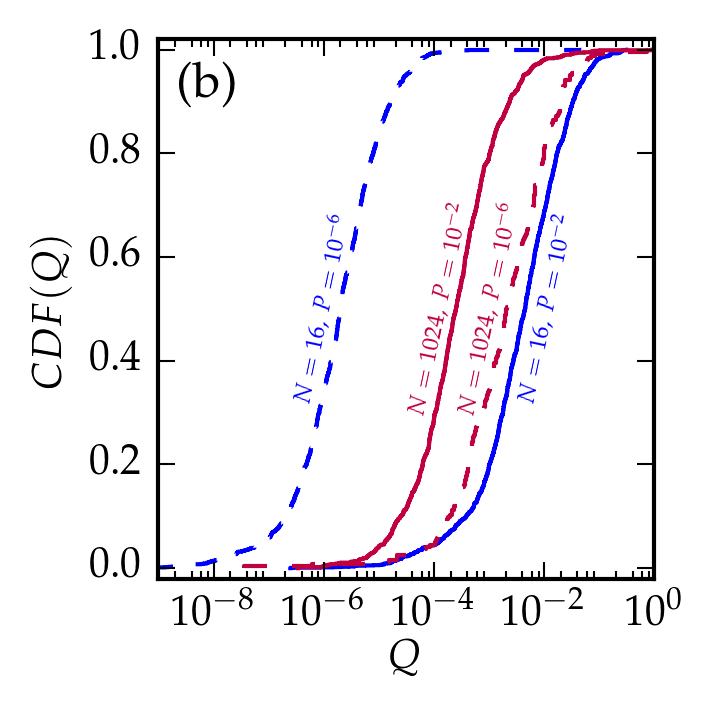

In [19]:
import cdf
halffig()
ax = gca()
bins = np.logspace(-10, 1, 25)

xlabel("$Q$", labelpad=0)
ylabel(r"$CDF(Q)$", labelpad=4)

meds = {}
ls = {-2: 'solid', -4: 'dotted', -6: 'dashed'}
for N in [16,1024]:
    for lP in [-2, -6]:
        P = 10**lP
        kwargs = NPmapper(N,P)
        
        mask = (dataN == N) * (datalP == lP)
        sdata = summ[mask]

        Q = np.abs(sdata["lambdaquad"] * sdata["gamma_min"] / sdata["Gquad"])
        print np.sum(np.isnan(Q)), len(Q)
        Q = Q[np.isfinite(Q)]

        x,y = cdf.get_cdf_data(Q)  
        plt.plot(x, y, label="$N=%i$\n$P=10^{%i}$" % (N,lP),
                 color=kwargs['mec'], linestyle=ls[lP])
        
        meds[(N,lP)] = (np.median(Q), np.nanmean(Q), np.nanstd(Q), kwargs['mec'])


print "\n".join(repr(x) for x in sorted(meds))
        
plt.text(0.04,0.96, r'(b)',
        transform=gca().transAxes,
        verticalalignment='top',
        horizontalalignment='left',
        size='large')

for (N,lP),(med, mea, std, color) in meds.items():
    xoffset = 0.5
    if N == 16 and lP == -2:
        xoffset = 2.5

    plt.text(med*xoffset, 0.5,
             "$N=%i,~P=10^{%i}$" % (N,lP),
             size='xx-small',
             rotation=78,
             horizontalalignment='center',
             verticalalignment='center',
             color=color)
    

plt.semilogx()
plt.axis(xmin=1e-9, xmax=1e0, ymin=-0.02, ymax=1.02)
plt.xticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0])
#plt.legend(fontsize='xx-small', frameon=False, loc='center left')

savefig('cdf-of-Q.pdf')

\includegraphics{notebooks/quadratic-stress-fit/scaling-N-and-P.pdf}
\includegraphics{notebooks/quadratic-stress-fit/scaling-lambdasq-N-and-P.pdf}


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:33: RuntimeWarning: invalid value encountered in absolute


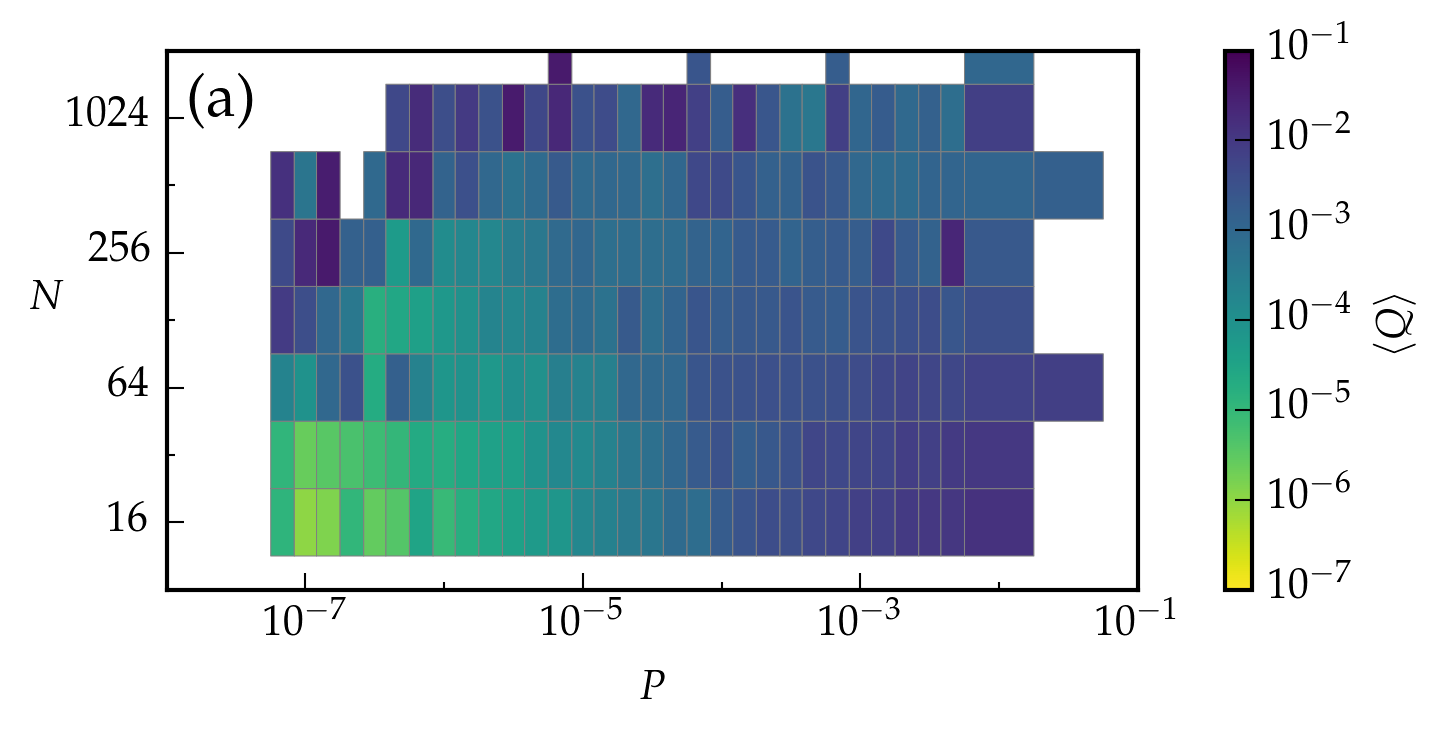

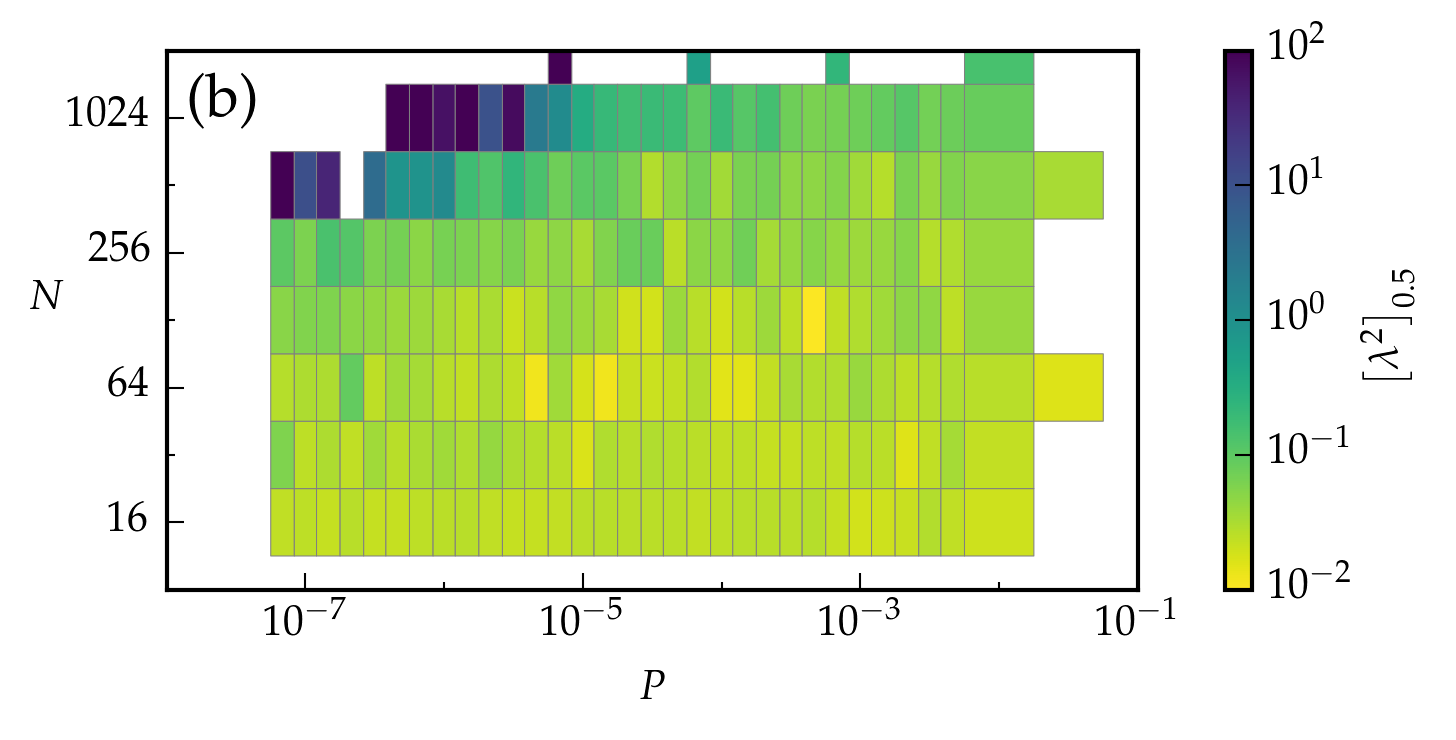

In [35]:
def extended(d):
    l = log10(d)
    dl = l[-1] - l[-2]
    l = l - 0.5*dl
    l = np.concatenate([l, [l[-1]+dl]])
    return 10**l

Ns = [16, 32, 64, 128, 256, 512, 1024, 2048]
lPs = list(unique(datalP))

eNs = extended(Ns)
ePs = extended(10**np.array(lPs))
NN,PP = meshgrid(eNs, ePs)

data = np.tile(np.nan, (len(lPs), len(Ns)))
lambdadata = np.tile(np.nan, (len(lPs), len(Ns)))
lambdasqdata = np.tile(np.nan, (len(lPs), len(Ns)))

Qs = []

for lP in lPs:
    for N in Ns:
        mask = (dataN == N) * (datalP == lP)
        if sum(mask) < 20:
            continue
        sdata = summ[mask]
        #Q = np.abs(sdata["lambdaquad"] * sdata["gamma_min"] / sdata["Gquad"])
        Q = np.abs(sdata["lambdaquad"] * sdata["gamma_min"]**2 / sdata["s_xy_min"])
        if np.sum(np.isfinite(Q)) > 20:
            data[ lPs.index(lP), Ns.index(N) ] = np.nanmean(Q)   
            Qs.append(np.nanmean(Q))

        lambd = np.abs(sdata["lambdaquad"])
        if np.sum(np.isfinite(lambd)) > 20:
            lambdadata[ lPs.index(lP), Ns.index(N) ] = np.nanmean(lambd)  
            
        lambdsq = sdata["lambdaquad"]**2
        if np.sum(np.isfinite(lambd)) > 20:
            lambdasqdata[ lPs.index(lP), Ns.index(N) ] = np.median(lambdsq[isfinite(lambdsq)]) #np.nanmean(lambdsq)  
            
def plot_d(data, vmin, vmax, label, cbticks):
    mdata = np.ma.masked_array(data, ~np.isfinite(data))
    cmap = 'viridis_r'
    pcolor(PP,NN,mdata,
       norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax), cmap=cmap, edgecolors='gray')
    loglog()

    axis(xmin=1e-8, xmax=1e-1, ymin=8, ymax=2048)
    xticks([1e-7, 1e-5, 1e-3, 1e-1])
    yticks([16,64,256,1024], map(str, [16,64,256,1024]))

    gca().xaxis.set_ticks_position("bottom")
    gca().yaxis.set_ticks_position("left")

    cb = colorbar(pad=0.07)
    cb.set_label(label)
    cb.set_ticks(cbticks)

    ylabel("$N$", rotation='horizontal')
    xlabel("$P$")

    axis(xmin=1e-8, xmax=1e-1, ymin=8, ymax=2048)
    xticks([1e-7, 1e-5, 1e-3, 1e-1])
    gca().set_xticks([1e-8,1e-6,1e-4,1e-2], minor=True)
    yticks([16,64,256,1024], map(str, [16,64,256,1024]))
    gca().set_yticks([32,128,512], minor=True)

fullfig()
plot_d(data, vmin=1e-7, vmax=1e-1, label=r"$\langle Q \rangle$", cbticks=[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1])
subplotlabel('(a)')
savefig('scaling-N-and-P.pdf')

#fullfig()
#plot_d(lambdadata, vmin=1e-3, vmax=1e5, label=r"$\langle| \lambda |\rangle$", cbticks=[1e-3,1e-1,1e1,1e3,1e5])
#savefig('scaling-lambdaabs-N-and-P.pdf')

fullfig()
plot_d(lambdasqdata, vmin=1e-2, vmax=1e2, label=r"$\left[\lambda^2\right]_{0.5}$", cbticks=[1e-2,1e-1,1e0,1e1,1e2])
subplotlabel('(b)')
savefig('scaling-lambdasq-N-and-P.pdf')


# Fig (a) = response very quadratic system

In [4]:
N = 16
lP = -2
mask = (dataN == N) * (datalP == lP) * (summ['num'] == 9109)
dmaxQ = summ[mask][0]

In [5]:
# also find one where response is very linear, with comparable sigma and gamma?
err = (summ["s_xy_min"] - dmaxQ["s_xy_min"])**2 + (summ["gamma_min"] - dmaxQ["gamma_min"])**2

N = 16
lP = -2

m = (dataN == N) * (datalP == lP)
Qs = np.abs(summ[m]['lambdaquad'] * summ[m]["gamma_min"] / summ[m]["Gquad"])
Qmn = np.mean(Qs)


i = np.argsort((Qs - Qmn) ** 2)[0]
norm_num = summ[m][i]["num"]
print Qs[i], summ[m][i]["N"], summ[m][i]["P"], norm_num

# N=16 P=0.01 #=9461

m_dnormQ = (dataN == 16) * (datalP == -2) * (summ['num'] == norm_num)
dnormQ = summ[m][0]

0.0136101553231 16 0.01 384


In [6]:
from hdf_tools import getcc
reload(getcc)
import numpy.lib.recfunctions
# een van de maxima is 16 -2 0.305307171073 9244
# plot stress-strain diagram van die set

f = tables.File(r"E:\PhD rearrangements\auto\h5\N16~P1e-2_shear.h5")
sheardata_group = f.root.__getattr__('N16').__getattr__('P1e-2').__getattr__('9109') #9244')
sheardata_data = sheardata_group.SR.data.read()

# add index column?!
sheardata_data = numpy.lib.recfunctions.append_fields(sheardata_data, 'index', np.arange(len(sheardata_data)), usemask=False)

sheardata_normal_group = f.root.__getattr__('N16').__getattr__('P1e-2').__getattr__('%04i' % norm_num)
sheardata_normal_data = sheardata_normal_group.SR.data.read()
sheardata_normal_data = numpy.lib.recfunctions.append_fields(sheardata_normal_data, 'index', np.arange(len(sheardata_normal_data)), usemask=False)
# to build the stress-strain curve, we need to get data for consecutive contact changes, and only use the
# data points < gammamax for each contact change.

#ccgen = getcc.get_multi_ccs(sheardata_group, sheardata_data)
#x = ccgen.next()
#print x
#print x[1]["Nchanges"]
#print ccgen.next()

G2 = 9.05e-02
lambda = 8.34e-01
gamma* = 2.75e-03
Q =  0.0253099700146
G2 = 2.36e-02
lambda = -2.57e-01
gamma* = 2.46e-02
0 1892
1 1987
0 1035
1 243
(16, -6)
(16, -2)
(1024, -6)
(1024, -2)
\includegraphics{notebooks/quadratic-stress-fit/combined.pdf}


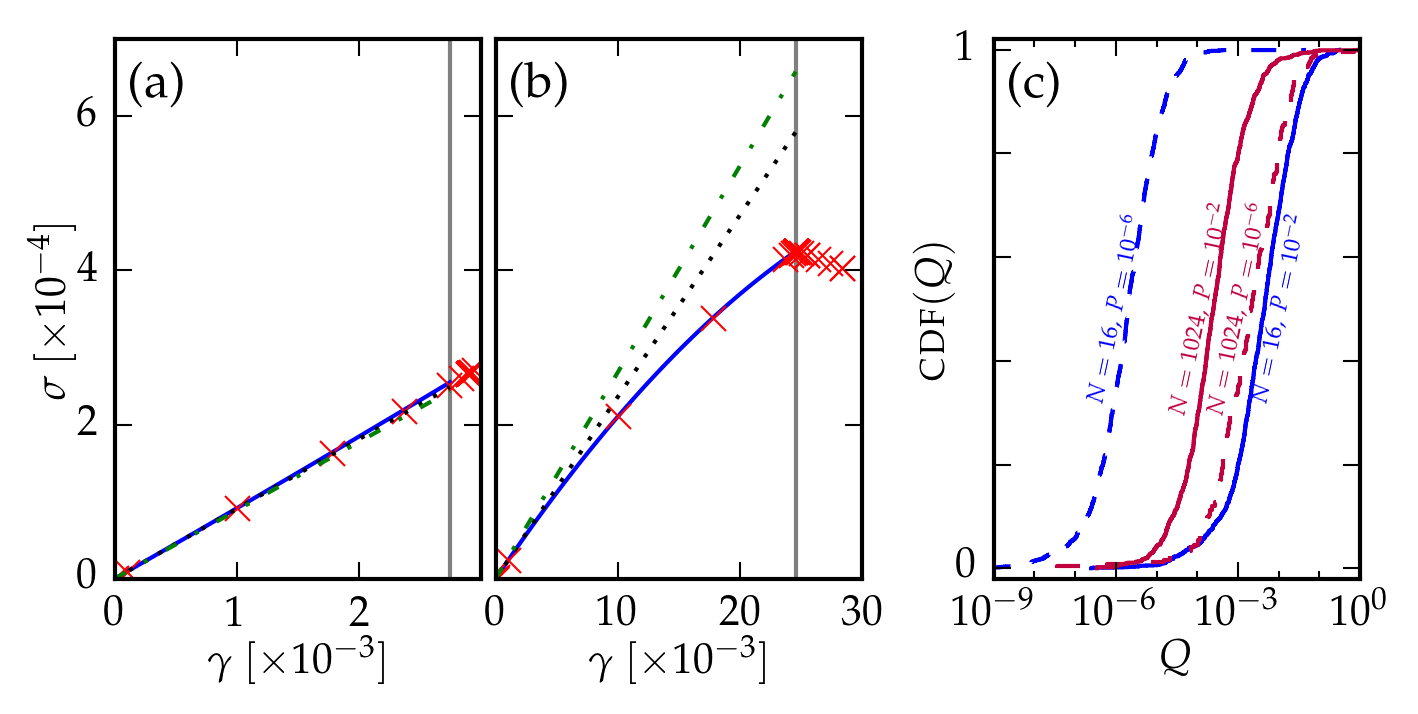

In [22]:
import cdf
fullfig()

# (a)
ax = ax1 = plt.subplot(1,3,1)
plt.axvline(dnormQ["gamma_min"], color="gray")
x = linspace(0,dnormQ["gamma_min"])
plt.plot(x, x*dnormQ["Gquad"] + x*x*dnormQ["lambdaquad"])
print "G2 = %.2e" % dnormQ["Gquad"]
print "lambda = %.2e" % dnormQ["lambdaquad"]
print "gamma* = %.2e" % dnormQ["gamma_min"]
print "Q = ", np.abs((dnormQ["lambdaquad"]*dnormQ["gamma_min"]) / dnormQ["Gquad"])

plt.plot(sheardata_normal_data['gamma'], sheardata_normal_data['s_xy'], 'rx')

plt.plot(x, x*dnormQ["Gquad"], 'k:')
plt.plot(x, x*dnormQ["c3_base"], 'g-.')

plt.xticks([0,0.001,0.002],
           ['0', '1', '2'])
plt.yticks([0, 0.0002, 0.0004, 0.0006],
           ['0', '2', '4', '6'])
plt.xlabel(r"$\gamma~[\times 10^{-3}]$", labelpad=0)
plt.ylabel(r"$\sigma~[\times 10^{-4}]$", labelpad=0)
plt.axis(xmin=0.00, xmax=0.003, ymin=0, ymax=0.0007)

plt.text(0.04,0.96, r'(a)',
        transform=gca().transAxes,
        verticalalignment='top',
        horizontalalignment='left',
        size='large')



# (b)
ax = ax2 = plt.subplot(1,3,2)
# move to stack with plot (a)

pos1 = ax1.get_position()
pos2 = ax2.get_position()
ax2.set_position([pos1.x0 + pos1.width + 0.01, pos2.y0, pos2.width, pos2.height])

plt.axvline(dmaxQ["gamma_min"], color="gray")
x = linspace(0,dmaxQ["gamma_min"])
plt.plot(x, x*dmaxQ["Gquad"] + x*x*dmaxQ["lambdaquad"])
print "G2 = %.2e" % dmaxQ["Gquad"]
print "lambda = %.2e" % dmaxQ["lambdaquad"]
print "gamma* = %.2e" % dmaxQ["gamma_min"]

plt.plot(sheardata_data['gamma'], sheardata_data['s_xy'], 'rx')

plt.plot(x, x*dmaxQ["Gquad"], 'k:')
plt.plot(x, x*dmaxQ["c3_base"], 'g-.')

plt.xticks([0,0.01,0.02,0.03],
           ['0', '10', '20', '30'])
plt.yticks([0, 0.0002, 0.0004, 0.0006],[])

plt.xlabel(r"$\gamma~[\times 10^{-3}]$", labelpad=0)
#plt.ylabel(r"$\sigma~[10^{-4}]$", labelpad=0)
plt.axis(xmin=0.00, xmax=0.03, ymin=0, ymax=0.0007)

plt.text(0.04,0.96, r'(b)',
        transform=gca().transAxes,
        verticalalignment='top',
        horizontalalignment='left',
        size='large')

# (c)

ax = ax3 = plt.subplot(1,3,3)
bins = np.logspace(-10, 1, 25)

xlabel("$Q$", labelpad=0)
ylabel(r"$\textsc{cdf}(Q)$", labelpad=0)

meds = {}
ls = {-2: 'solid', -4: 'dotted', -6: 'dashed'}
for N in [16,1024]:
    for lP in [-2, -6]:
        P = 10**lP
        kwargs = NPmapper(N,P)
        
        mask = (dataN == N) * (datalP == lP)
        sdata = summ[mask]

        Q = np.abs(sdata["lambdaquad"] * sdata["gamma_min"] / sdata["Gquad"])
        print np.sum(np.isnan(Q)), len(Q)
        Q = Q[np.isfinite(Q)]
        x,y = cdf.get_cdf_data(Q)  
        plt.plot(x, y, label="$N=%i$\n$P=10^{%i}$" % (N,lP),
                 color=kwargs['mec'], linestyle=ls[lP])
        
        meds[(N,lP)] = (np.median(Q), np.nanmean(Q), np.nanstd(Q), kwargs['mec'])


print "\n".join(repr(x) for x in sorted(meds))
        
plt.text(0.04,0.96, r'(c)',
        transform=gca().transAxes,
        verticalalignment='top',
        horizontalalignment='left',
        size='large')

for (N,lP),(med, mea, std, color) in meds.items():
    xoffset = 0.5
    if N == 16 and lP == -2:
        xoffset = 2.5

    plt.text(med*xoffset, 0.5,
             "$N=%i,~P=10^{%i}$" % (N,lP),
             size='xx-small',
             rotation=78,
             horizontalalignment='center',
             verticalalignment='center',
             color=color)
    

plt.semilogx()
plt.axis(xmin=1e-9, xmax=1e0, ymin=-0.02, ymax=1.02)

ax = gca()
ax.set_xticks([1e-9, 1e-6, 1e-3, 1e0], minor=False)
ax.set_xticks([1e-8, 1e-7, 1e-5, 1e-4, 1e-2, 1e-1], minor=True)

plt.yticks([0,0.2,0.4,0.6,0.8,1], ["0", '','','','','1'])
#plt.legend(fontsize='xx-small', frameon=False, loc='center left')

plt.savefig('combined.pdf')